<a href="https://colab.research.google.com/github/hamdan-bot/GIgx-Data-Analytics/blob/main/customer_churnanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
print(os.getcwd())

/content


In [ ]:
f = open('/content/Customer Churn.csv') # Replace with the actual path

replacing blanks with 0 as tenure 0 and no total charges are recorded

In [ ]:
df['TotalCharges']=df['TotalCharges'].replace(" ","0")
df['TotalCharges']=df['TotalCharges'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Customer Churn.csv')
df
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.isnull().sum().sum()

np.int64(0)

In [ ]:
df["SeniorCitizen"].duplicated().sum()

np.int64(7042)

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
def conv(value):
  if value == '1':
    return "yes"
  else:
    return "no"
df['SeniorCitizen']=df['SeniorCitizen'].apply(conv)
df['SeniorCitizen']


,SeniorCitizen
0,no
1,no
2,no
3,no
4,no
...,...
7038,no
7039,no
7040,no
7041,no


we converted 0 and 1 value of senior citixzen to yes/no to make it eaiser to understand


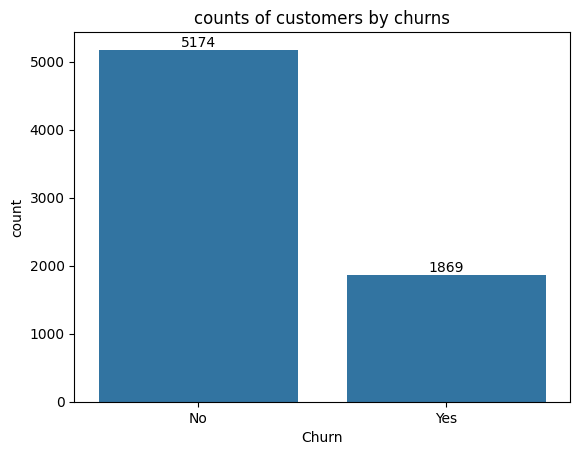

In [ ]:
ax=sns.countplot(x='Churn',data=df)
ax.bar_label(ax.containers[0])
plt.title('counts of customers by churns')
plt.show()

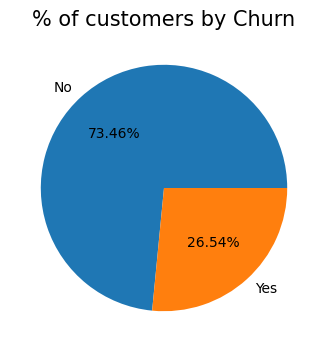

In [ ]:
plt.figure(figsize=(4,4))
plt.pie(df['Churn'].value_counts(),
labels=df['Churn'].value_counts().index,autopct='%1.2f%%')

plt.title('% of customers by Churn',fontsize=15)
plt.show()


from pie chart we can conclude that 26.54% are churned out  

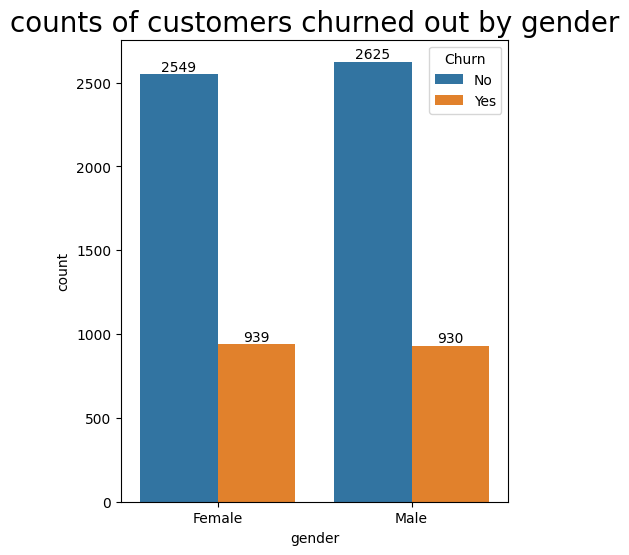

In [ ]:
plt.figure(figsize=(5,6))
bx=sns.countplot(x='gender',data=df, hue ='Churn')
bx.bar_label(bx.containers[0])
bx.bar_label(bx.containers[1])
plt.title('counts of customers churned out by gender',fontsize=20)
plt.show()

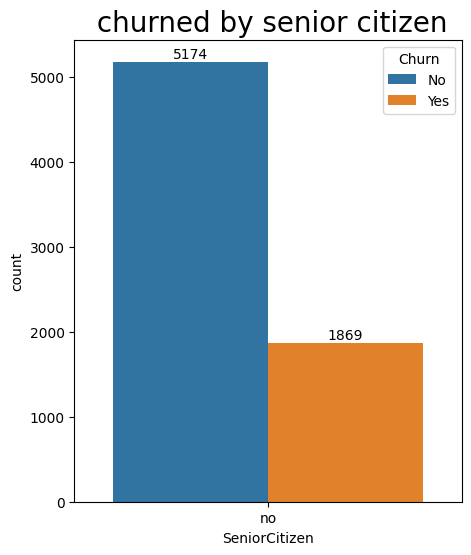

In [ ]:
plt.figure(figsize=(5,6))
bx=sns.countplot(x='SeniorCitizen',data=df, hue ='Churn')
bx.bar_label(bx.containers[0])
bx.bar_label(bx.containers[1])
plt.title(' churned by senior citizen',fontsize=20)
plt.show()

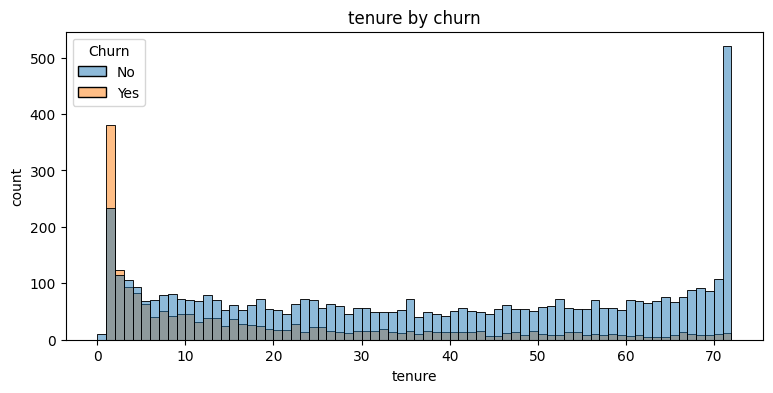

In [ ]:
plt.figure(figsize=(9,4))

sns.histplot(x='tenure',data=df,bins=72,hue = 'Churn')
plt.xlabel('tenure')
plt.ylabel('count')
plt.title('tenure by churn')
plt.show()

people who have stayed re loyal and many people leaaves early

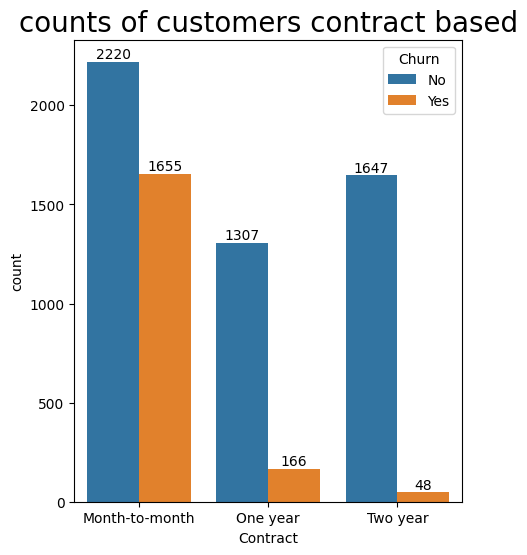

In [ ]:
plt.figure(figsize=(5,6))
bx=sns.countplot(x='Contract',data=df,hue='Churn')
bx.bar_label(bx.containers[0])
bx.bar_label(bx.containers[1])
plt.title('counts of customers contract based',fontsize=20)
plt.show()

people with month to month contract will churn out ealry while one-year ,two year remains

In [ ]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [ ]:
cols = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

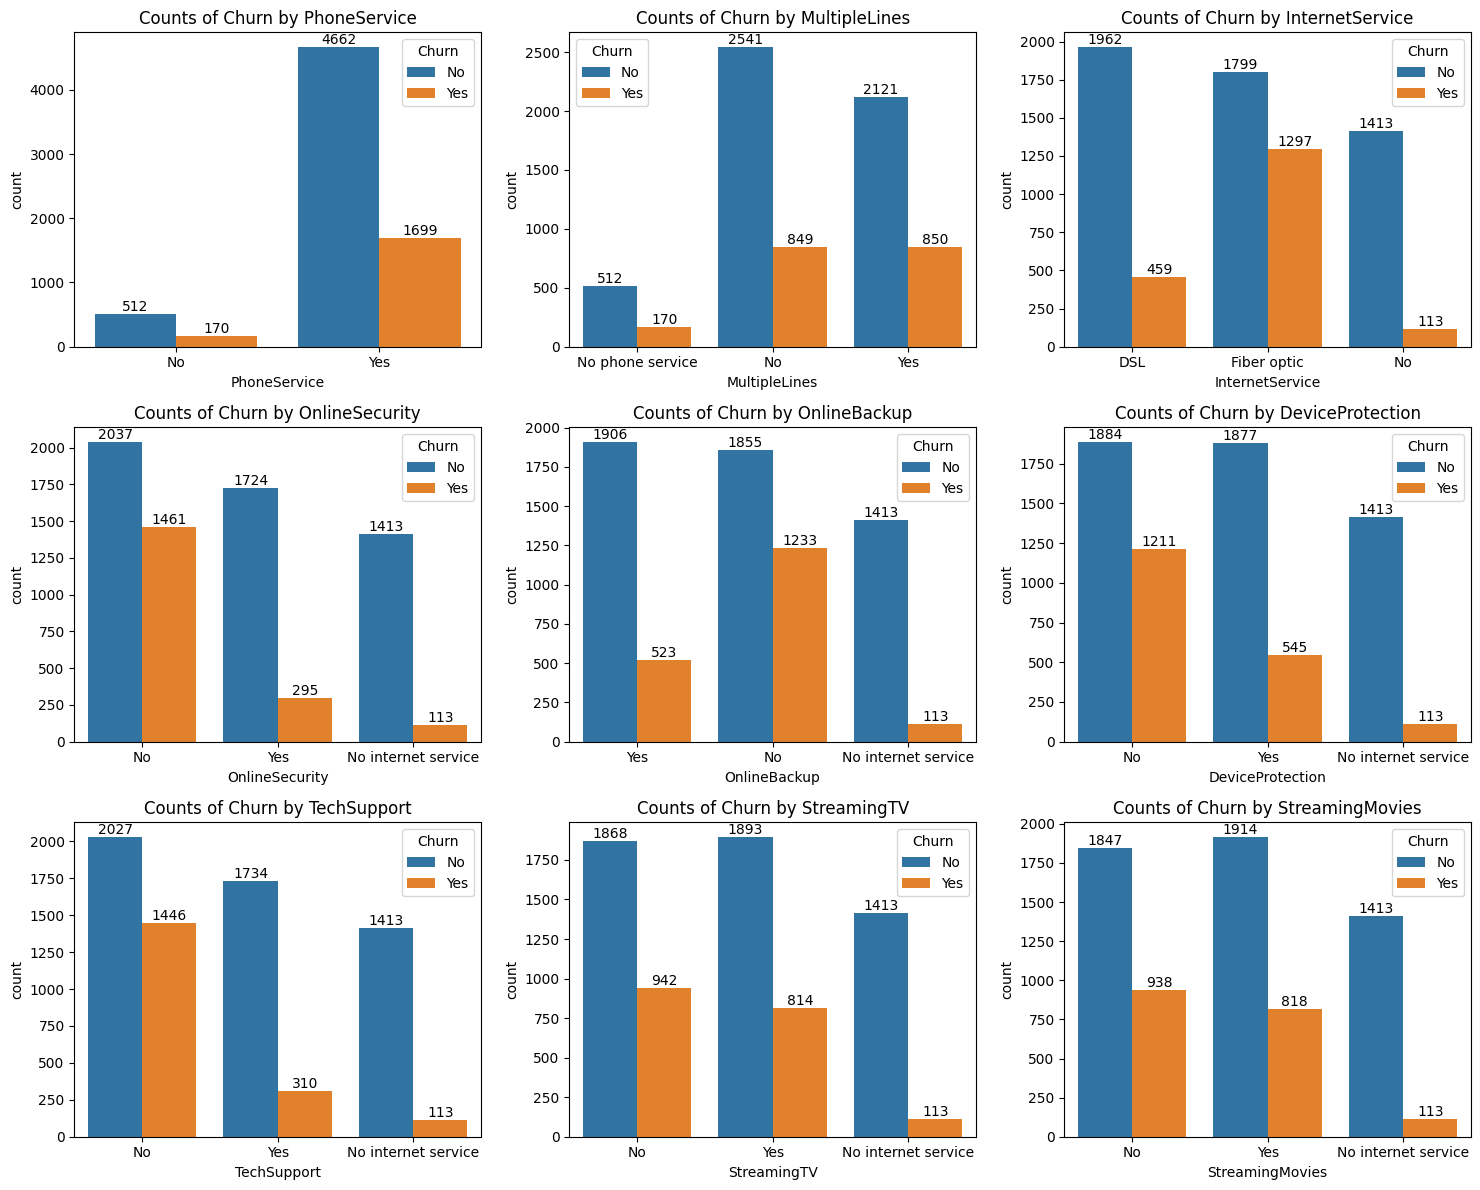

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12)) # 3 rows, 3 columns

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.countplot(x=col, data=df, hue='Churn', ax=axes[i])
    axes[i].set_title(f'Counts of Churn by {col}')
    axes[i].bar_label(axes[i].containers[0])  # Add labels for churned customers
    axes[i].bar_label(axes[i].containers[1]) # Add labels for not churned customers


plt.tight_layout()  # Adjust spacing between subplots
plt.show()